In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [24]:
palette = sns.color_palette("RdBu_r", 7)

In [2]:
gi = pd.read_excel('giraffe.xlsx')

In [3]:
gi_orig_size = len(gi.index)
print(f'giraffe data has {gi_orig_size} rows')

giraffe data has 1582 rows


In [4]:
# drop irrelevant cols
gi = gi.drop(['IMAGE ID', 'INDIVIDUAL', 'CAMERA', 
             'CAMERA TEMPERATURE','MOONPHASE',
              'Direction (numerical)'], axis=1)

In [5]:
gi.Passage.unique()

array([0, 1, '*', 713, nan], dtype=object)

In [6]:
# drop missing data and outlier
gi = gi[(gi.Passage != '*') & (gi.Passage != 713)]
gi = gi[gi.Passage.isnull() == False]

In [7]:
print('{:.2f}% of data remaining after filter on Passage'
      .format(len(gi.index) / gi_orig_size))

0.90% of data remaining after filter on Passage


In [8]:
gi.Passage.unique()

array([0, 1], dtype=object)

In [9]:
gi_c = gi.copy()

In [10]:
# convert to numeric
gi['Passage'] = gi['Passage'].astype(int)

In [11]:
gi.Passage.dtype

dtype('int32')

In [12]:
gi.DIRECTION.unique()

array([nan, 'IN', 'OUT', 'ALONG', 'UNKNOWN'], dtype=object)

In [13]:
# drop where DIRECTION = "Along"
gi = gi[gi.DIRECTION != 'ALONG']
print('{:.2f}% of data remaining after filter on DIRECTION != ALONG'
      .format(len(gi.index) / gi_orig_size))

0.81% of data remaining after filter on DIRECTION != ALONG


In [14]:
month_mean = gi.groupby('DATE.1').mean()['Passage'].reset_index()

In [15]:
a = ['januari','februari','mars',
     'april','maj','juni','juli',
     'augusti','september','oktober',
     'november','december']

In [16]:
date_map = {month: i for i, month in enumerate(a)}

In [17]:
date_map = {month: i for i, month in enumerate(a)}

In [18]:
date_map

{'april': 3,
 'augusti': 7,
 'december': 11,
 'februari': 1,
 'januari': 0,
 'juli': 6,
 'juni': 5,
 'maj': 4,
 'mars': 2,
 'november': 10,
 'oktober': 9,
 'september': 8}

In [19]:
def add_month_digits(x):
    x['i'] = 0
    for month, i in date_map.items():
        x.loc[x['DATE.1'] == month, 'i'] = i
    return x

In [20]:
month_names = ['January','February','March',
               'April','May','June','July',
               'August','September','October',
               'November','December']

In [21]:
gi_i = add_month_digits(gi)

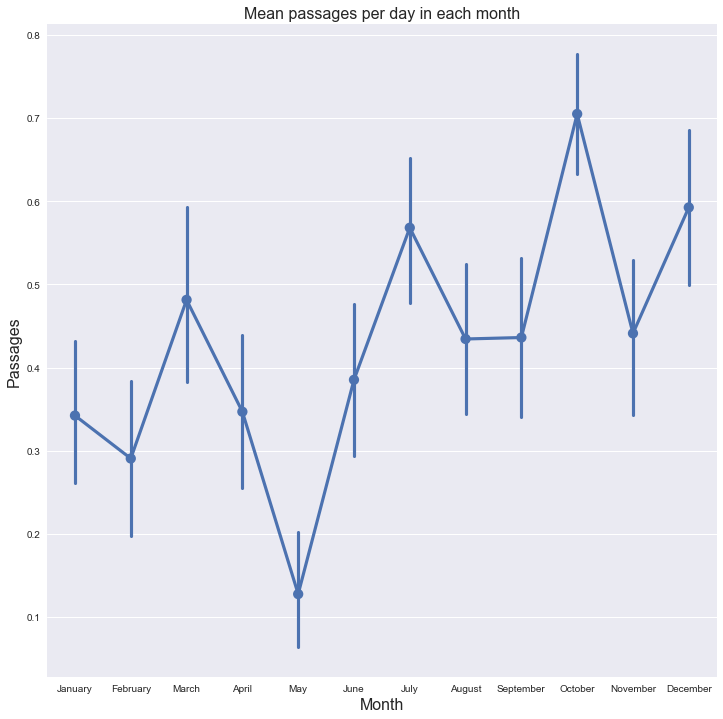

In [25]:
fig, ax = plt.subplots(figsize=(12,12))
sns.pointplot(x='i', y='Passage', data=gi_i, ci=95)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Mean passages per day in each month', fontsize=16)
_=ax.set_xticklabels(month_names)

## eller som barplot..

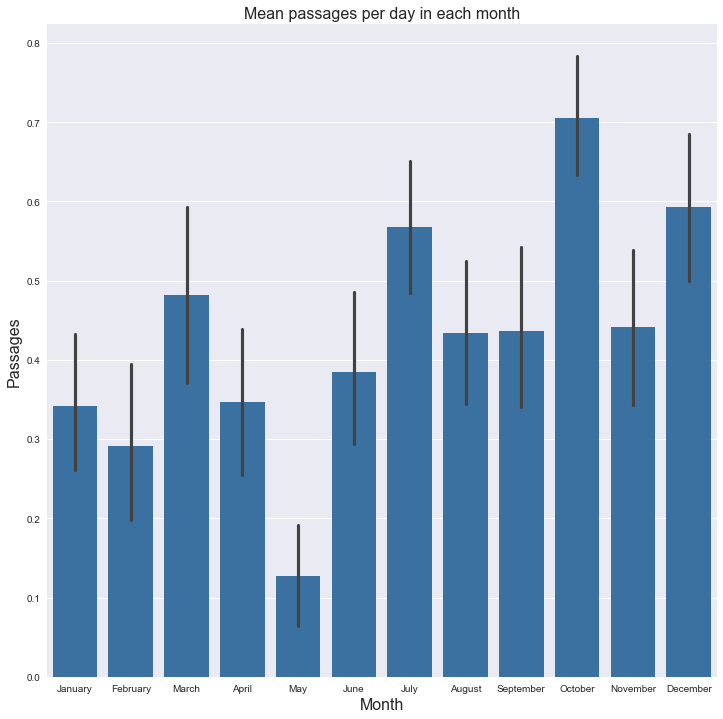

In [26]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(x='i', y='Passage', data=gi_i, ci=95, palette=[palette[0]])
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Mean passages per day in each month', fontsize=16)
_=ax.set_xticklabels(month_names)

## eller med fina färger?

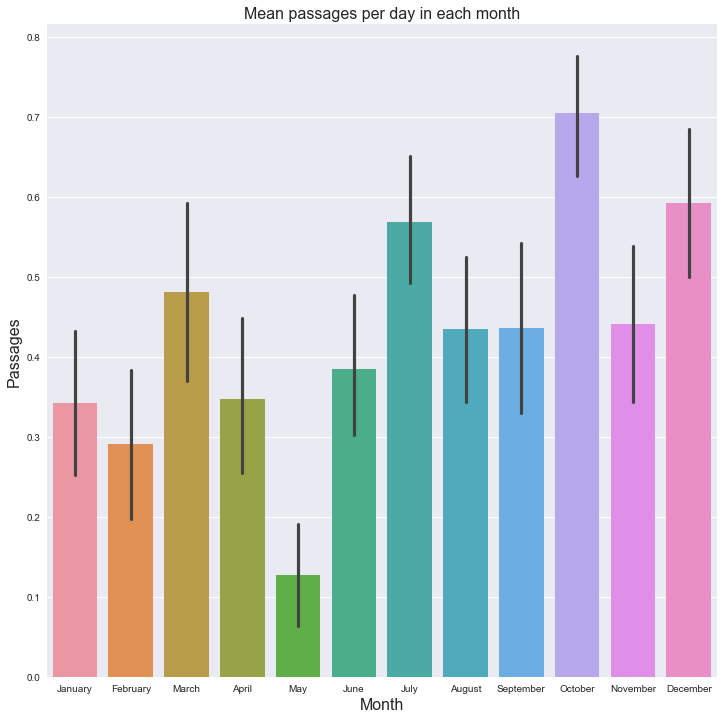

In [27]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(x='i', y='Passage', data=gi_i, ci=95)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Mean passages per day in each month', fontsize=16)
_=ax.set_xticklabels(month_names)

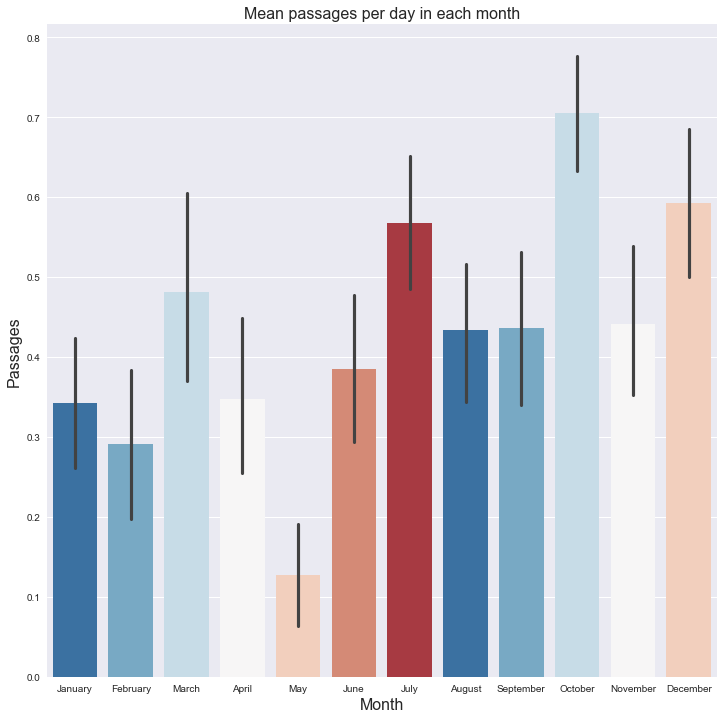

In [28]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(x='i', y='Passage', data=gi_i, ci=95, palette=palette)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Mean passages per day in each month', fontsize=16)
_=ax.set_xticklabels(month_names)

In [31]:
# drop missing HOUR values
gi = gi[gi.HOUR.isnull() == False]
print('{:.2f}% of data remaining after filter on HOUR'
      .format(len(gi.index) / gi_orig_size))

0.36% of data remaining after filter on HOUR


Det fanns mycket saknade HOUR värden..

Alla gånger passage är 1 finns det en tid, men det finns inte en enda passage = 0 som faktiskt har en tid. Dvs det finns inga passage = 0 på något giltigt klockslag. se nedan

In [34]:
# bara en giltig passage som saknar tid
gi[(gi.Passage == 1) & (gi.HOUR.isnull())]

,DATE,DATE.1,CORRIDOR,HOUR,SEX,DIRECTION,IN,OUT,GROUP SIZE,Passage W/O along,Passage,COMMENT,MOON LUMINOSITY,MEAN TEMP,PRESSURE,HUMIDITY,WIND SPEED,CLOUD COVERAGE,DATE.2,i


In [35]:
# ger en tom frame
gi[(gi.Passage == 0) & (gi.HOUR.isnull() == False)]

,DATE,DATE.1,CORRIDOR,HOUR,SEX,DIRECTION,IN,OUT,GROUP SIZE,Passage W/O along,Passage,COMMENT,MOON LUMINOSITY,MEAN TEMP,PRESSURE,HUMIDITY,WIND SPEED,CLOUD COVERAGE,DATE.2,i


In [37]:
print('antal Passage=0 och HOUR=NaN är {} rows'.format(
    len(gi[(gi.Passage == 0) & (gi.HOUR.isnull() == True)].index)))

antal Passage=0 och HOUR=NaN är 0 rows


### Vilken tid på dygnet använder girafferna korridoren? Passage vs hour

In [38]:
# set hour to int
gi['HOUR'] = gi['HOUR'].astype(int)

In [39]:
hour_group = gi.groupby('HOUR').sum()['Passage'].reset_index()

In [40]:
errs = gi.groupby('HOUR').std()['Passage']

In [41]:
len(gi[gi.Passage == 0].index)

0

Text(0.5,1,'Passages in either direction by hour')

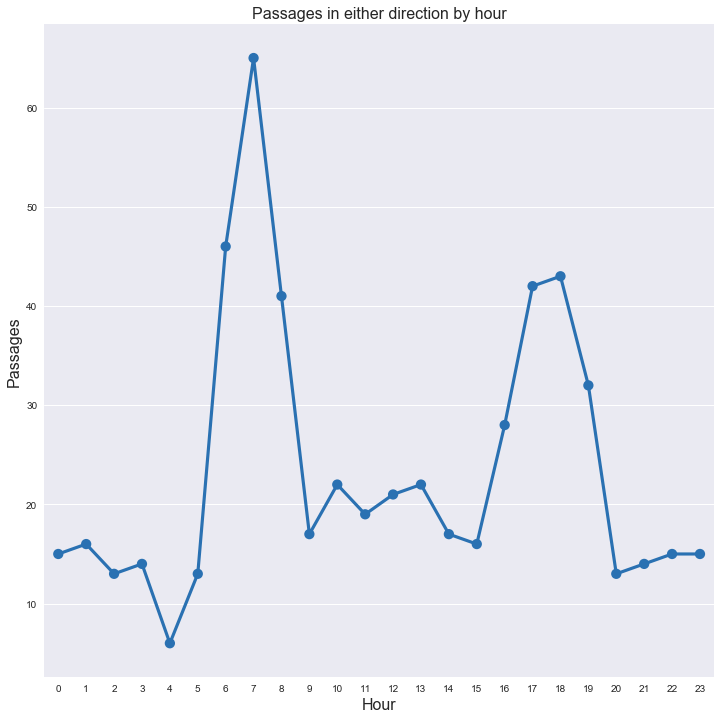

In [42]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=hour_group,
                  color=palette[0])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in either direction by hour', fontsize=16)

### Hur många passager görs respektive månad? Passage vs månad

In [43]:
month_group = gi.groupby('DATE.1').sum()['Passage'].reset_index()

In [44]:
month_group = add_month_digits(month_group)

In [45]:
month_group = month_group.sort_values(by='i')

In [46]:
month_group

,DATE.1,Passage,i
4,januari,38,0
3,februari,25,1
8,mars,39,2
0,april,34,3
7,maj,12,4
6,juni,42,5
5,juli,75,6
1,augusti,53,7
11,september,41,8
10,oktober,98,9


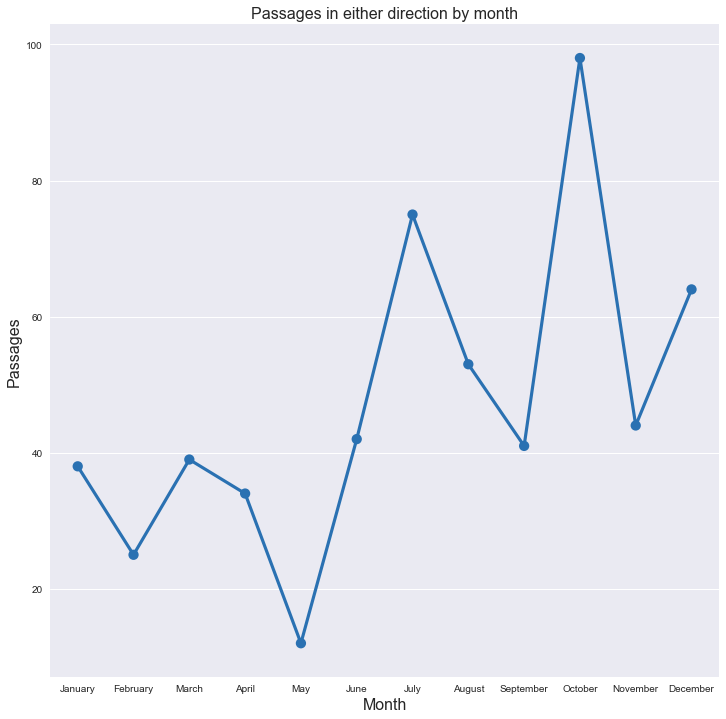

In [47]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='DATE.1', y='Passage', data=month_group,
                  color=palette[0])
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in either direction by month', fontsize=16)
_=ax.set_xticklabels(month_names)

### Vilken tid på dygnet går de in? In/direction vs hour

In [48]:
in_group = gi[gi.DIRECTION == 'IN'].groupby('HOUR').sum()['Passage'].reset_index()

Text(0.5,1,'Passages going in by hour')

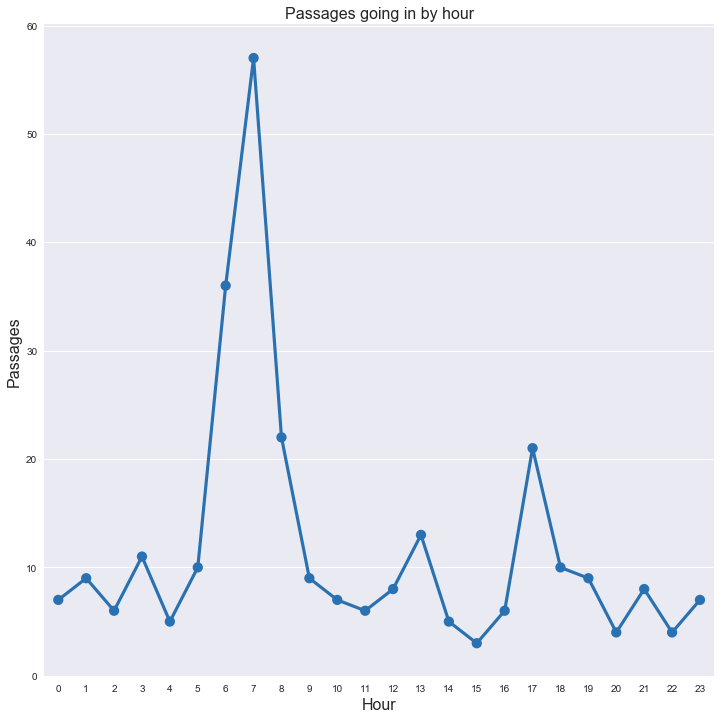

In [49]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=in_group,
                  color=palette[0])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages going in by hour', fontsize=16)

### Vilken tid på dygnet går de in? In/direction vs hour

In [50]:
out_group = gi[gi.DIRECTION == 'OUT'].groupby('HOUR').sum()['Passage'].reset_index()

Text(0.5,1,'Passages going out by hour')

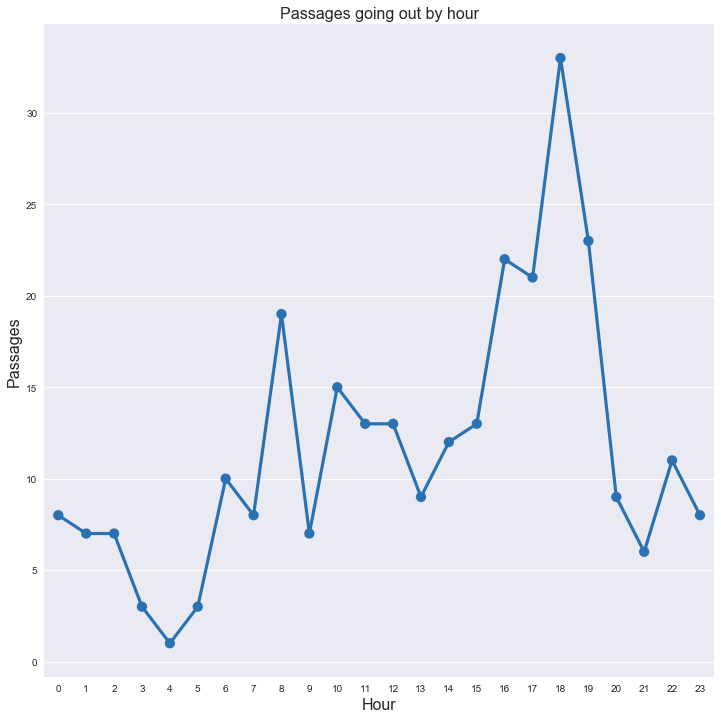

In [51]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=out_group, 
                   color=palette[0], ci='sd')
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages going out by hour', fontsize=16)

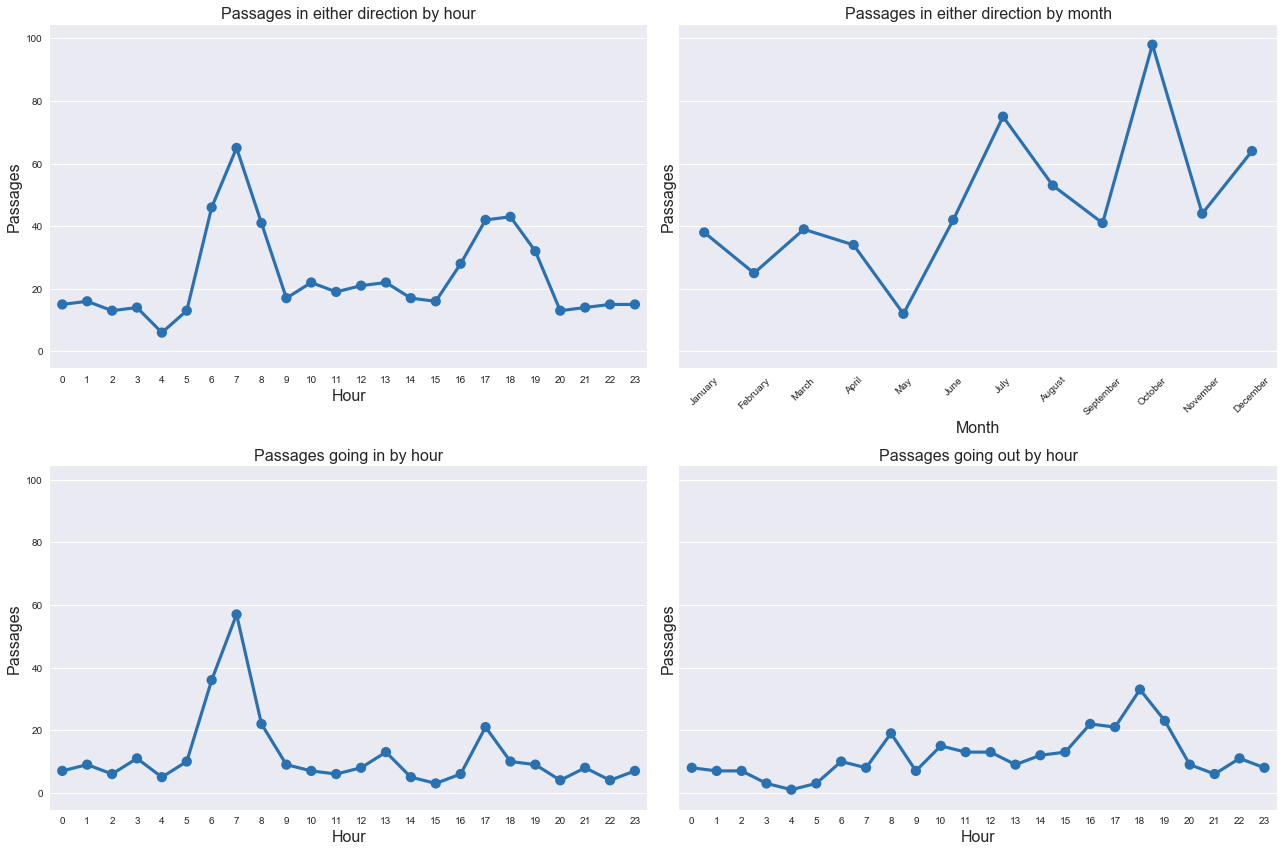

In [105]:
fig, axes = plt.subplots(2,2, figsize=(18,12), sharey=True)
axes = axes.flatten()

sns.pointplot(x='HOUR', y='Passage', data=hour_group,
                  color=palette[0], ax=axes[0])
axes[0].set_xlabel('Hour', fontsize=16)
axes[0].set_ylabel('Passages', fontsize=16)
axes[0].set_title('Passages in either direction by hour', fontsize=16)

sns.pointplot(x='DATE.1', y='Passage', data=month_group,
                  color=palette[0], ax=axes[1])
axes[1].set_xlabel('Month', fontsize=16)
axes[1].set_ylabel('Passages', fontsize=16)
axes[1].set_title('Passages in either direction by month', fontsize=16)
_=axes[1].set_xticklabels(month_names, rotation=45)

sns.pointplot(x='HOUR', y='Passage', data=in_group,
                  color=palette[0], ax=axes[2])
axes[2].set_xlabel('Hour', fontsize=16)
axes[2].set_ylabel('Passages', fontsize=16)
axes[2].set_title('Passages going in by hour', fontsize=16)

sns.pointplot(x='HOUR', y='Passage', data=out_group, 
                   color=palette[0], ci='sd', ax=axes[3])
axes[3].set_xlabel('Hour', fontsize=16)
axes[3].set_ylabel('Passages', fontsize=16)
axes[3].set_title('Passages going out by hour', fontsize=16)

plt.tight_layout()

### Det kanske går att göra en graf med tre variabler både för in, ut och timme?

In [52]:
import matplotlib.patches as mpatches

In [53]:
direction_group = gi[(gi.DIRECTION == 'IN') | (gi.DIRECTION == 'OUT')].groupby(['HOUR', 'DIRECTION']).sum()['Passage'].reset_index()

In [54]:
both_group = direction_group.copy()

In [55]:
both_group = both_group.groupby('HOUR').sum()['Passage'].reset_index()

In [56]:
both_group['DIRECTION'] = 'EITHER'

In [57]:
both_group = both_group[['HOUR', 'DIRECTION', 'Passage']]

In [58]:
both_group = direction_group.append(both_group)

In [59]:
both_group['DIRECTION'] = both_group['DIRECTION'].str.title()

Text(0.5,1,'Passages by hour')

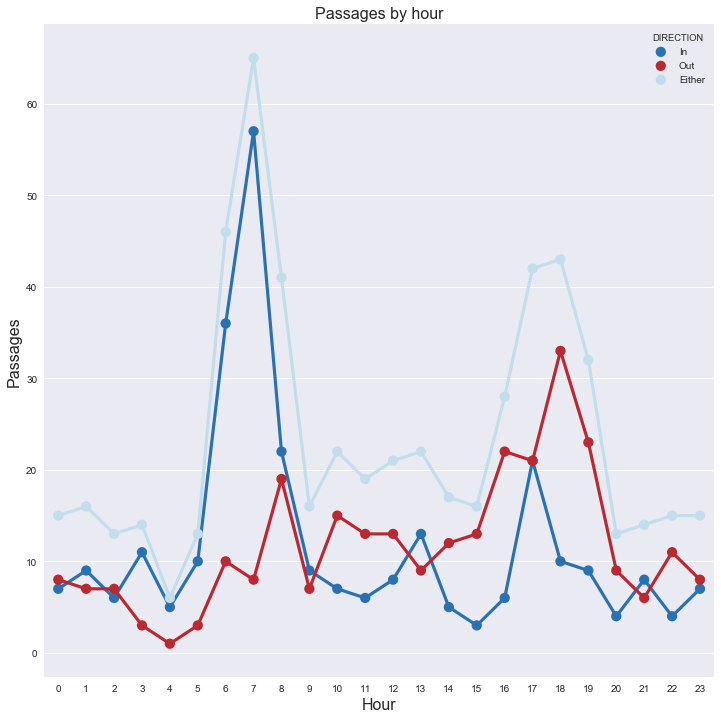

In [60]:
fig, ax = plt.subplots(figsize=(12,12))
sns.pointplot(x='HOUR', y='Passage', hue='DIRECTION', 
              data=both_group, palette=[palette[0], palette[-1], palette[2]])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages by hour', fontsize=16)

In [61]:
direction_group.head()

,HOUR,DIRECTION,Passage
0,0,IN,7
1,0,OUT,8
2,1,IN,9
3,1,OUT,7
4,2,IN,6


In [65]:
# drop SEX missing values
gi = gi[gi['SEX'].isnull() == False]

In [66]:
sex_group = gi.groupby(['HOUR', 'SEX']).sum()['Passage'].reset_index()

In [67]:
sex_all = sex_group.copy()
sex_all = sex_all.groupby('HOUR').sum()['Passage'].reset_index()
sex_all['SEX'] = 'ALL'
sex_all = sex_all[['HOUR', 'SEX', 'Passage']]
sex_all = sex_all.append(sex_group)

In [68]:
sex_all.head()

,HOUR,SEX,Passage
0,0,ALL,15
1,1,ALL,16
2,2,ALL,13
3,3,ALL,14
4,4,ALL,6


In [69]:
sex_all.loc[sex_all.SEX == 'U', 'SEX'] = 'Unknown'
sex_all.loc[sex_all.SEX == 'M', 'SEX'] = 'Male'
sex_all.loc[sex_all.SEX == 'F', 'SEX'] = 'Female'
sex_all.loc[sex_all.SEX == 'ALL', 'SEX'] = 'All'

Text(0.5,1,'Passages by hour')

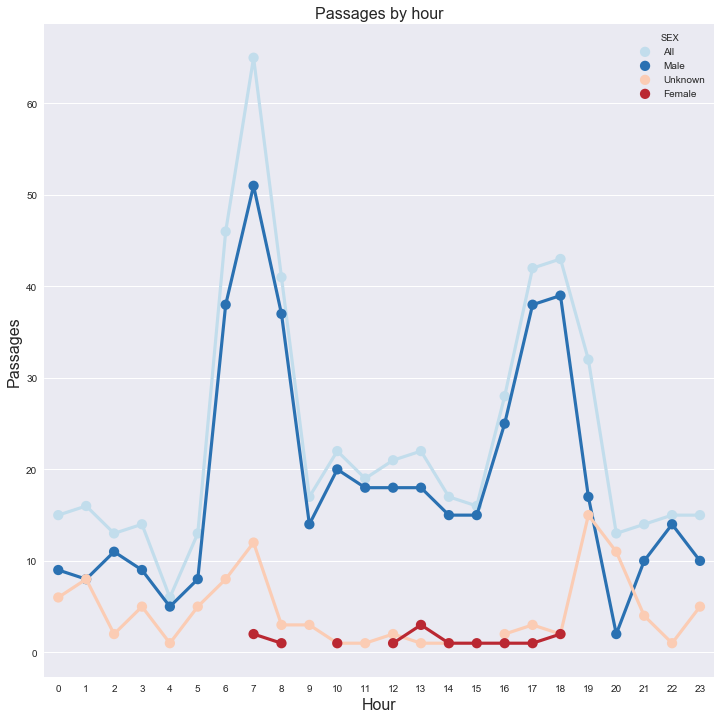

In [70]:
fig, ax = plt.subplots(figsize=(12,12))
sns.pointplot(x='HOUR', y='Passage', hue='SEX', 
              data=sex_all, palette=[palette[2], palette[0], 
                                     palette[4], palette[-1]])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages by hour', fontsize=16)

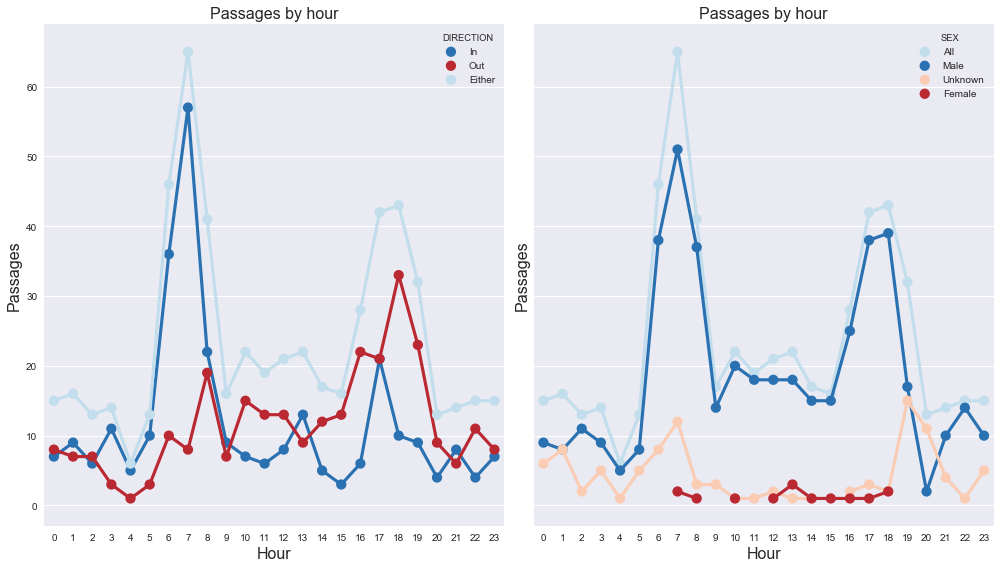

In [255]:
fig, axes = plt.subplots(1,2,figsize=(14,8), sharey=True)
axes = axes.flatten()
sns.pointplot(x='HOUR', y='Passage', hue='DIRECTION', 
              data=both_group, palette=[palette[0], palette[-1], palette[2]],
              ax = axes[0])
axes[0].set_xlabel('Hour', fontsize=16)
axes[0].set_ylabel('Passages', fontsize=16)
axes[0].set_title('Passages by hour', fontsize=16)

sns.pointplot(x='HOUR', y='Passage', hue='SEX', 
              data=sex_all, palette=[palette[2], palette[0], 
                                     palette[4], palette[-1]],
              ax = axes[1])
axes[1].set_xlabel('Hour', fontsize=16)
axes[1].set_ylabel('Passages', fontsize=16)
axes[1].set_title('Passages by hour', fontsize=16)

plt.tight_layout()

### Hur många djur använder korridoren samtidigt? Passage vs group size

In [71]:
gi['GROUP SIZE'] = gi['GROUP SIZE'].astype(int)

In [72]:
group_size = gi.groupby(['GROUP SIZE', 'SEX']).sum()['Passage'].reset_index()

In [73]:
group_size.head()

,GROUP SIZE,SEX,Passage
0,1,F,5
1,1,M,322
2,1,U,75
3,2,F,6
4,2,M,73


In [74]:
group_size['GROUP SIZE'] = group_size['GROUP SIZE'].astype(int)

In [75]:
group_size.loc[group_size.SEX == 'U', 'SEX'] = 'Unknown'
group_size.loc[group_size.SEX == 'M', 'SEX'] = 'Male'
group_size.loc[group_size.SEX == 'F', 'SEX'] = 'Female'

In [76]:
male_group_size = gi[(gi['SEX'] == 'M') & (gi['GROUP SIZE'] <= 3)]\
.groupby('GROUP SIZE').sum()['Passage'].reset_index()

In [77]:
male_group_size

,GROUP SIZE,Passage
0,1,322
1,2,73
2,3,26


In [78]:
print('total male passages with group size <= 3: {}'.format(male_group_size['Passage'].sum()))

total male passages with group size <= 3: 421


Båda på samma plot:

Text(0.5,1,'Passages in different group sizes')

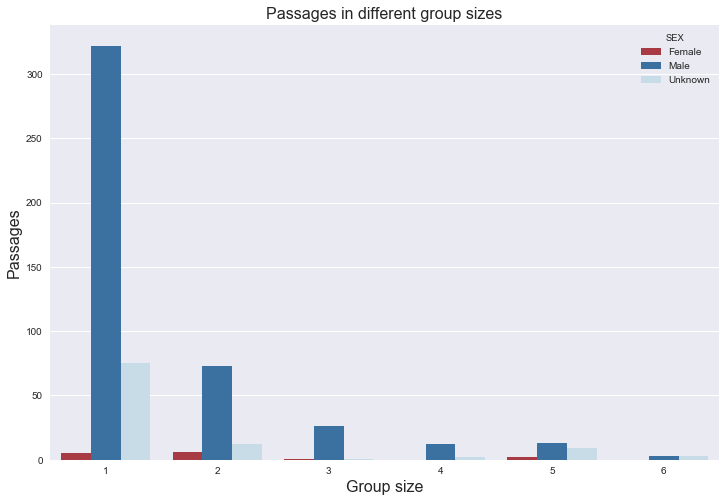

In [79]:
fig, ax = plt.subplots(1, figsize=(12,8))
sns.barplot(x='GROUP SIZE', y='Passage', hue='SEX',
            data=group_size, ax=ax, palette=[palette[-1], palette[0],palette[2]])
ax.set_xlabel('Group size', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in different group sizes', fontsize=16)

Text(0.5,1,'Passages in different group sizes')

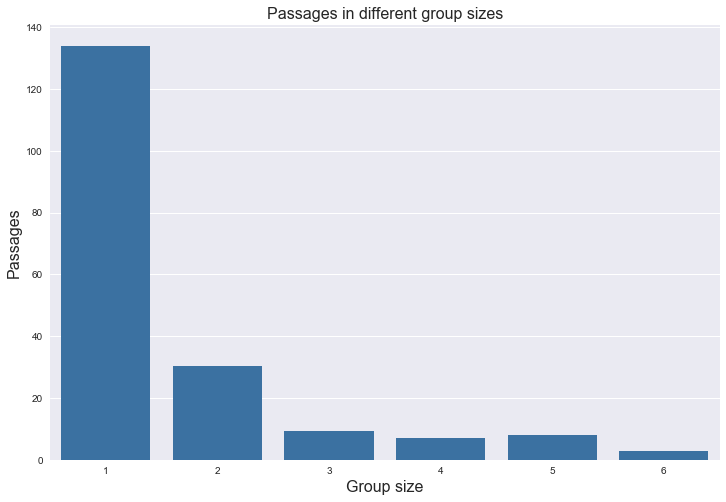

In [117]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='GROUP SIZE', y='Passage', 
            data=group_size, ax=ax, color=palette[0], ci=None)
ax.set_xlabel('Group size', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in different group sizes', fontsize=16)

### Hur många passager utgörs av ensamma handjur eller hanar i grupper om 3 eller färre? Dvs group size ≤3 där alla individer är hanar ”sex=M”, alternativt sex=U men det blir kanske för osäkert.

Text(0.5,1,'Passages by males in groups sizes <= 3')

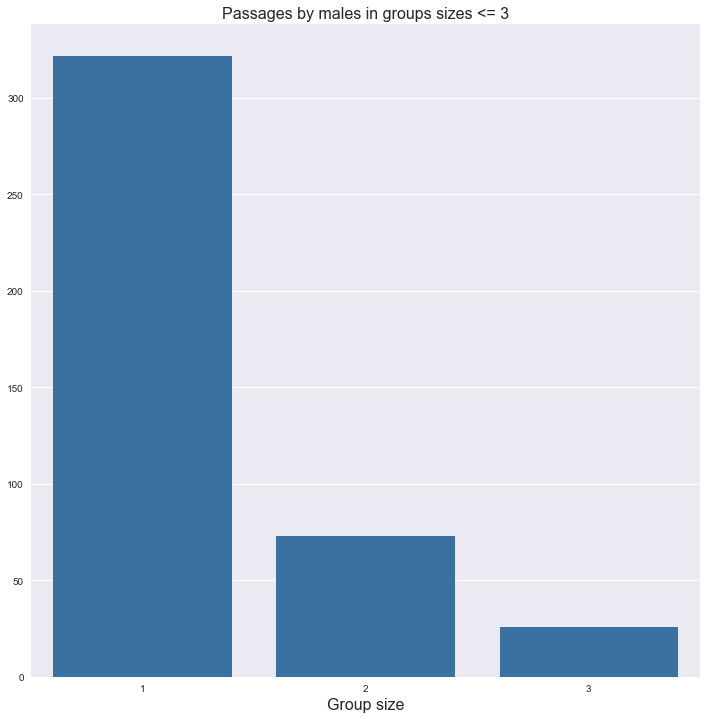

In [81]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(x='GROUP SIZE', y='Passage', 
            data=male_group_size, ax=ax, color=palette[0])
ax.set_xlabel('Group size', fontsize=16)
ax.set_ylabel('')
ax.set_title('Passages by males in groups sizes <= 3', fontsize=16)

### Heatmap of hour+month vs passage

In [82]:
hour_month = gi.groupby(['DATE.1', 'HOUR'], sort=False).sum()['Passage'].reset_index()

In [83]:
hour_month = add_month_digits(hour_month)

In [84]:
hour_month = hour_month.sort_values(by=['i','HOUR'])

In [85]:
hour_month.head()

,DATE.1,HOUR,Passage,i
119,januari,0,2,0
20,januari,1,3,0
176,januari,2,1,0
19,januari,3,2,0
120,januari,4,2,0


In [86]:
hour_month = hour_month[['i', 'HOUR', 'Passage']]

In [87]:
hour_month = hour_month.rename(index=str, 
                               columns={"i": "Month", 
                                        "HOUR": "Hour"})

In [88]:
pivoted = hour_month.pivot('Hour', 'Month', 'Passage')

In [89]:
pivoted.fillna(0, inplace=True)

## I heatmap ser man trenderna

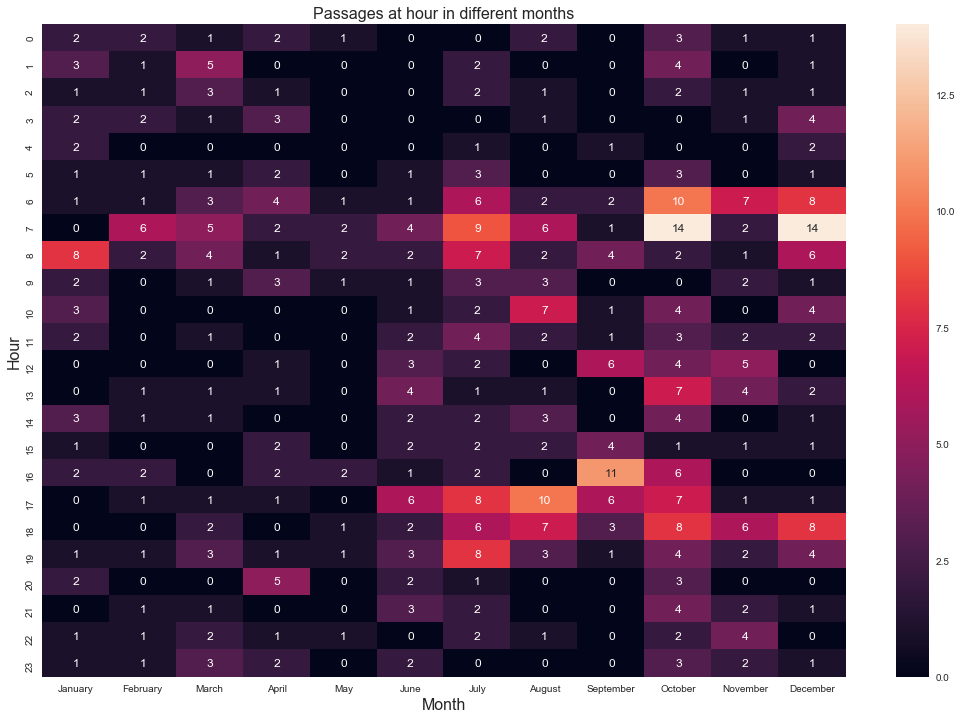

In [90]:
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(pivoted, ax=ax, annot=True)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Hour', fontsize=16)
ax.set_title('Passages at hour in different months', fontsize=16)
_=ax.set_xticklabels(
    ['January','February','March','April','May',
     'June','July','August','September','October',
     'November','December']
)

In [91]:
!pip install joypy

## Verkar som dessa joyplots blir lite utdragna, de har extra smoothing eller nåt.. de blir lite missvisande om man jämför med vanliga distributionsplots för samma månad/timme, se nedan 

In [92]:
import joypy

ModuleNotFoundError: No module named 'joypy'

In [ ]:
hour_month.head()

In [ ]:
month_names

In [ ]:
hour_month = hour_month.rename(index=str, columns={'Month': 'month_id'})

In [ ]:
def add_month_names(x):
    x['Month'] = ''
    for i, month in enumerate(month_names):
        x.loc[x['month_id'] == i, 'Month'] = month
    return x

In [ ]:
hour_month = add_month_names(hour_month)

## Jämför december och januari med joyploten

In [ ]:
sns.distplot(hour_month[hour_month['Month'] == 'December']['Passage'])

In [ ]:
sns.distplot(hour_month[hour_month['Month'] == 'January']['Passage'])

In [ ]:
plt.figure(figsize=(24,24), dpi=80)
fig, axes = joypy.joyplot(hour_month, 
                          column='Passage', 
                          by='Month', 
                          ylim='own',
                          figsize=(18,10),
                          labels=month_names)

# Decoration
#[ax.set_yticklabels(m) for ax, m in zip(axes, month_names)]
#axes[-3].set_xlabel('Hour', fontsize=16)
#axes[-1].set_ylabel('Passages', fontsize=16)
plt.title('Passages per month, summed over hour of the day', fontsize=22)
plt.show()
plt.tight_layout()

## Jämför timme 23 och timme 7 distributionerna med joyploten nedan

In [ ]:
sns.distplot(hour_month[hour_month['Hour'] == 23]['Passage'])

In [ ]:
sns.distplot(hour_month[hour_month['Hour'] == 7]['Passage'])

In [118]:
%matplotlib inline
plt.figure(figsize=(18,10), dpi= 80)
fig, axes = joypy.joyplot(hour_month, 
                          column='Passage', 
                          by="Hour", 
                          ylim='own', 
                          figsize=(14,10))

# Decoration
axes[-3].set_xlabel('Hour', fontsize=16)
axes[-1].set_ylabel('Passages', fontsize=16)
plt.title('Passages per hour, summed over months', fontsize=22)
plt.show()

NameError: name 'joypy' is not defined

In [119]:
xls = pd.ExcelFile('weather.xlsx')
we = pd.read_excel(xls, 'Daily Weather')

In [120]:
gi.head()

,DATE,DATE.1,CORRIDOR,HOUR,SEX,DIRECTION,IN,OUT,GROUP SIZE,Passage W/O along,Passage,COMMENT,MOON LUMINOSITY,MEAN TEMP,PRESSURE,HUMIDITY,WIND SPEED,CLOUD COVERAGE,DATE.2,i
2,2015-10-03,oktober,2.0,7,M,IN,1,0,1,1,1,NaN,0.8,23.0,1020.0,60.0,5.9,60.0,2015-10-03,9
3,2015-10-03,oktober,2.0,13,M,OUT,0,1,1,1,1,NaN,0.8,23.0,1020.0,60.0,5.9,60.0,2015-10-03,9
4,2015-10-03,oktober,2.0,13,U,OUT,0,1,1,1,1,NaN,0.8,23.0,1020.0,60.0,5.9,60.0,2015-10-03,9
5,2015-10-04,oktober,2.0,8,M,IN,1,0,1,1,1,NaN,0.7,22.0,1020.0,60.0,4.7,50.0,2015-10-04,9
12,2015-10-11,oktober,2.0,20,M,OUT,0,1,1,1,1,NaN,0.0,22.0,1020.0,60.0,4.1,50.0,2015-10-11,9


In [121]:
we.head()

,Date,Rain,Rain7,Rain30,Rain90,Temp,Temp7,Temp30,Temp90,Pressure ~,...,Temp7hi-lo,Temp30hi-lo,Temp90hi-lo,Rain7hi-lo,Rain30hi-lo,Rain90hi-lo,Unnamed: 23,Sum IN,Sum OUT,Sum INOUT
0,2015-10-01,18.0,12.0,11.0,10.0,23.0,21.857143,20.900000,19.644444,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0
1,2015-10-02,18.0,13.0,11.0,10.0,23.0,22.142857,20.966667,19.700000,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0
2,2015-10-03,18.0,14.0,11.0,10.0,23.0,22.428571,21.066667,19.744444,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,1,2,3
3,2015-10-04,18.0,15.0,11.0,10.0,22.0,22.571429,21.133333,19.788889,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,1,0,1
4,2015-10-05,18.0,16.0,12.0,10.0,22.0,22.571429,21.200000,19.833333,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0


In [122]:
we['Rain'] = we['Rain'] / 10
we['Rain7'] = we['Rain7'] / 10
we['Rain30'] = we['Rain30'] / 10
we['Rain90'] = we['Rain90'] / 10

In [123]:
we.head()

,Date,Rain,Rain7,Rain30,Rain90,Temp,Temp7,Temp30,Temp90,Pressure ~,...,Temp7hi-lo,Temp30hi-lo,Temp90hi-lo,Rain7hi-lo,Rain30hi-lo,Rain90hi-lo,Unnamed: 23,Sum IN,Sum OUT,Sum INOUT
0,2015-10-01,1.8,1.2,1.1,1.0,23.0,21.857143,20.900000,19.644444,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0
1,2015-10-02,1.8,1.3,1.1,1.0,23.0,22.142857,20.966667,19.700000,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0
2,2015-10-03,1.8,1.4,1.1,1.0,23.0,22.428571,21.066667,19.744444,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,1,2,3
3,2015-10-04,1.8,1.5,1.1,1.0,22.0,22.571429,21.133333,19.788889,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,1,0,1
4,2015-10-05,1.8,1.6,1.2,1.0,22.0,22.571429,21.200000,19.833333,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0


In [124]:
we = we.rename(index=str, columns={'Date': 'DATE'})

In [156]:
giwe = pd.merge(gi_c, we, how='outer', on='DATE')

In [126]:
giwe.columns

Index(['DATE', 'DATE.1', 'CORRIDOR', 'HOUR', 'SEX', 'DIRECTION', 'IN', 'OUT',
       'GROUP SIZE', 'Passage W/O along', 'Passage', 'COMMENT',
       'MOON LUMINOSITY', 'MEAN TEMP', 'PRESSURE', 'HUMIDITY', 'WIND SPEED',
       'CLOUD COVERAGE', 'DATE.2', 'i', 'Rain', 'Rain7', 'Rain30', 'Rain90',
       'Temp ', 'Temp7', 'Temp30', 'Temp90', 'Pressure ~', 'Humidity~',
       'Wind~', 'Cloud coverage~', 'Moon Luminosity~', '365Temp', '365CC',
       '365Rain', 'Temp7hi-lo', 'Temp30hi-lo', 'Temp90hi-lo', 'Rain7hi-lo',
       'Rain30hi-lo', 'Rain90hi-lo', 'Unnamed: 23', 'Sum IN', 'Sum OUT',
       'Sum INOUT'],
      dtype='object')

In [158]:
giwe = giwe.rename(index=str, columns={'Temp ': 'Temperature'})

In [159]:
giwe.loc[giwe.SEX == 'U', 'SEX'] = 'Unknown'
giwe.loc[giwe.SEX == 'M', 'SEX'] = 'Male'
giwe.loc[giwe.SEX == 'F', 'SEX'] = 'Female'

In [161]:
tmp = giwe[['DATE', 'Temperature', 'Passage W/O along', 'SEX']]

In [162]:
tmp = tmp.dropna()
tmp.head()

,DATE,Temperature,Passage W/O along,SEX
2,2015-10-03,23.0,1,Male
3,2015-10-03,23.0,1,Male
4,2015-10-03,23.0,1,Unknown
5,2015-10-04,22.0,1,Male
12,2015-10-11,22.0,1,Male


In [163]:
temp_group = tmp.groupby(['Temperature', 'SEX']).sum().reset_index()

In [164]:
temp_group.head()

,Temperature,SEX,Passage W/O along
0,13.0,Male,1
1,16.0,Male,10
2,16.0,Unknown,5
3,17.0,Female,0
4,17.0,Male,21


### Vid vilken dygnsmedeltemperatur görs flest passager? Signifikant? Passage (Kolumn AB) vs temp (kolumn F)

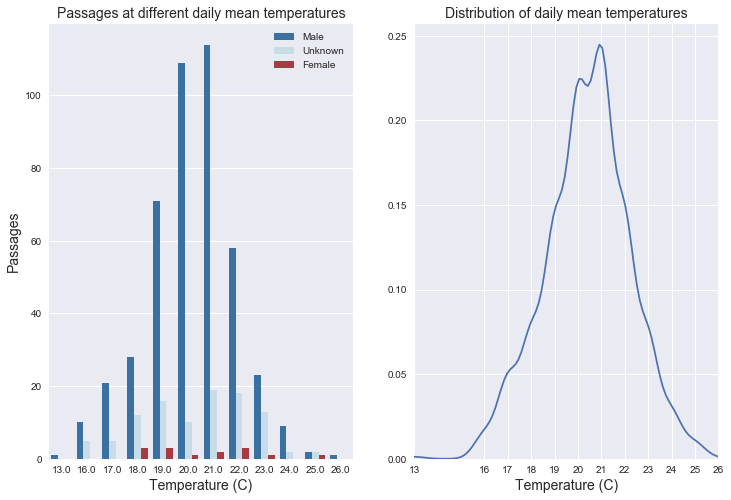

In [191]:
fig, axes = plt.subplots(1,2, figsize=(12,8))
sns.barplot(x='Temperature', y='Passage W/O along', hue='SEX',
            data=temp_group, ax=axes[0], palette=[palette[0], palette[2], palette[-1]])
axes[0].set_xlabel('Temperature (C)', fontsize=14)
axes[0].set_ylabel('Passages', fontsize=14)
axes[0].legend(loc='upper right')
axes[0].set_title('Passages at different daily mean temperatures', fontsize=14)

sns.distplot(giwe['Temperature'].dropna(), hist=False, ax=axes[1])
axes[1].set_title('Distribution of daily mean temperatures', fontsize=14)
axes[1].set_xlabel('Temperature (C)', fontsize=14)
axes[1].set_xlim(13, 26)
_=axes[1].set_xticks(temp_group['Temperature'].unique())

In [186]:
from scipy.stats import ttest_ind

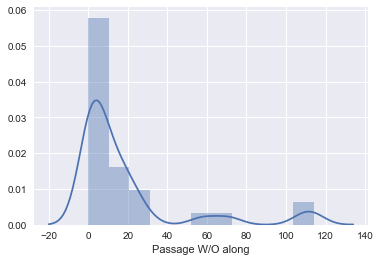

In [188]:
sns.distplot(temp_group['Passage W/O along'])

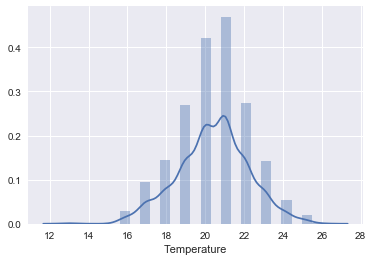

In [189]:
sns.distplot(giwe['Temperature'].dropna())

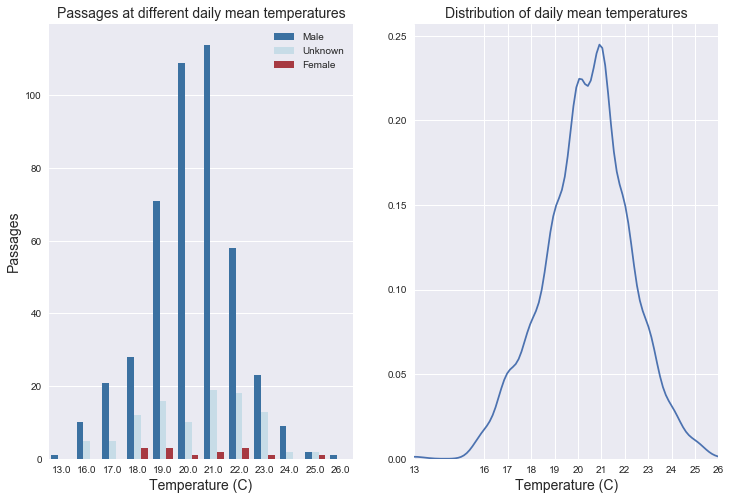

In [254]:
fig, axes = plt.subplots(1,2, figsize=(12,8))
sns.barplot(x='Temperature', y='Passage W/O along', hue='SEX',
            data=temp_group, ax=axes[0], palette=[palette[0], palette[2], palette[-1]])
axes[0].set_xlabel('Temperature (C)', fontsize=14)
axes[0].set_ylabel('Passages', fontsize=14)
axes[0].legend(loc='upper right')
axes[0].set_title('Passages at different daily mean temperatures', fontsize=14)

sns.distplot(giwe['Temperature'].dropna(), hist=False, ax=axes[1])
axes[1].set_title('Distribution of daily mean temperatures', fontsize=14)
axes[1].set_xlabel('Temperature (C)', fontsize=14)
axes[1].set_xlim(13, 26)
_=axes[1].set_xticks(temp_group['Temperature'].unique())

In [192]:
pivot_temp = temp_group.pivot(index='Temperature', columns='SEX', values='Passage W/O along')

C:\Users\Max\Anaconda3\lib\site-packages\pandas\plotting\_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


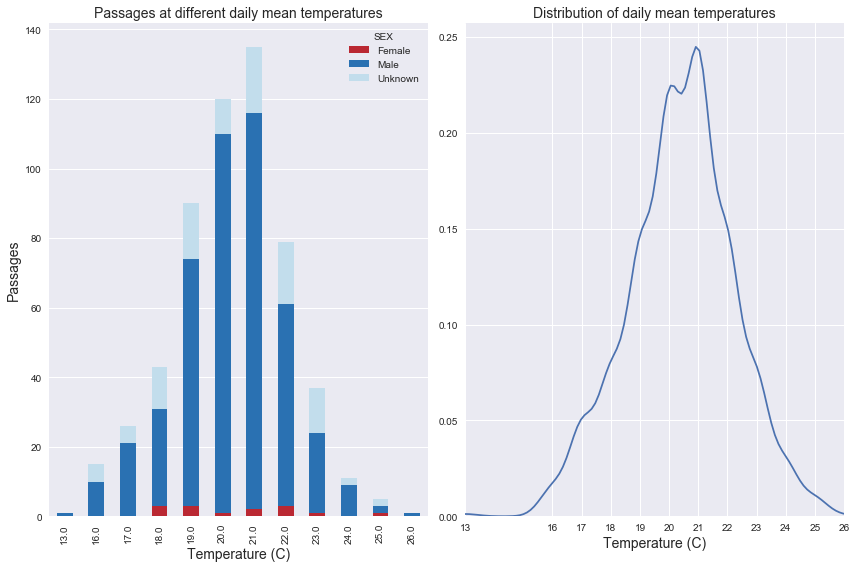

In [252]:
fig, axes = plt.subplots(1,2, figsize=(12,8))

pivot_temp.loc[:,].plot.bar(stacked=True, colors=[palette[-1], palette[0], palette[2]], ax=axes[0])
axes[0].set_xlabel('Temperature (C)', fontsize=14)
axes[0].set_ylabel('Passages', fontsize=14)
axes[0].set_title('Passages at different daily mean temperatures', fontsize=14)
plt.xticks(rotation=0)
axes[0].xaxis.grid(False)

sns.distplot(giwe['Temperature'].dropna(), hist=False, ax=axes[1])
axes[1].set_title('Distribution of daily mean temperatures', fontsize=14)
axes[1].set_xlabel('Temperature (C)', fontsize=14)
axes[1].set_xlim(13, 26)
_=axes[1].set_xticks(temp_group['Temperature'].unique())
axes[1].xaxis.grid(True, linestyle='-')

plt.tight_layout()

In [167]:
tmp = giwe[['DATE', 'Rain', 'Passage W/O along', 'SEX']].dropna()

In [168]:
tmp.dtypes

DATE                 datetime64[ns]
Rain                        float64
Passage W/O along            object
SEX                          object
dtype: object

In [169]:
tmp['Passage W/O along'] = tmp['Passage W/O along'].astype(int)

In [170]:
gr = tmp.groupby(['DATE', 'SEX']).mean().reset_index()

In [171]:
rain_group = gr.groupby(['Rain', 'SEX']).sum().reset_index()

### Vid vilken dygnsmedelnederbörd görs flest passager? Passage (AB) vs Rain (B)

Vet inte vilken av dessa som är tydligast.. kanske bäst med samma ticks på x-axeln för båda.

In [201]:
pivot_rain = rain_group.pivot(index='Rain', columns='SEX', values='Passage W/O along')

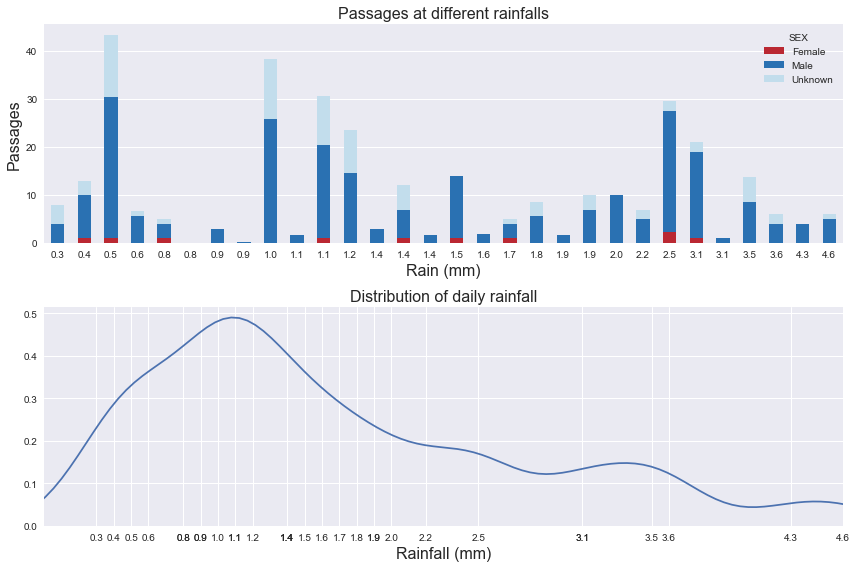

In [250]:
fig, axes = plt.subplots(2,1, figsize=(12,8))

pivot_rain.loc[:,].plot.bar(stacked=True, color=[palette[-1], palette[0], palette[2]], ax=axes[0])
axes[0].set_xlabel('Rain (mm)', fontsize=16)
axes[0].set_ylabel('Passages', fontsize=16)
axes[0].set_title('Passages at different rainfalls', fontsize=16)
axes[0].set_xticklabels(pivot_rain.index, rotation=0)
axes[0].xaxis.grid(False)
plt.grid(b=True, which='major', axis='x', linestyle='')
plt.grid(b=True, which='major', axis='y', linestyle='-')


sns.distplot(giwe['Rain'].dropna(), hist=False, ax=axes[1])
axes[1].set_title('Distribution of daily rainfall', fontsize=16)
axes[1].set_xlabel('Rainfall (mm)', fontsize=16)
axes[1].set_xlim(0, 4.6)
axes[1].set_xticks(rain_group['Rain'].unique())
axes[1].xaxis.grid(True, linestyle='-')
plt.tight_layout()

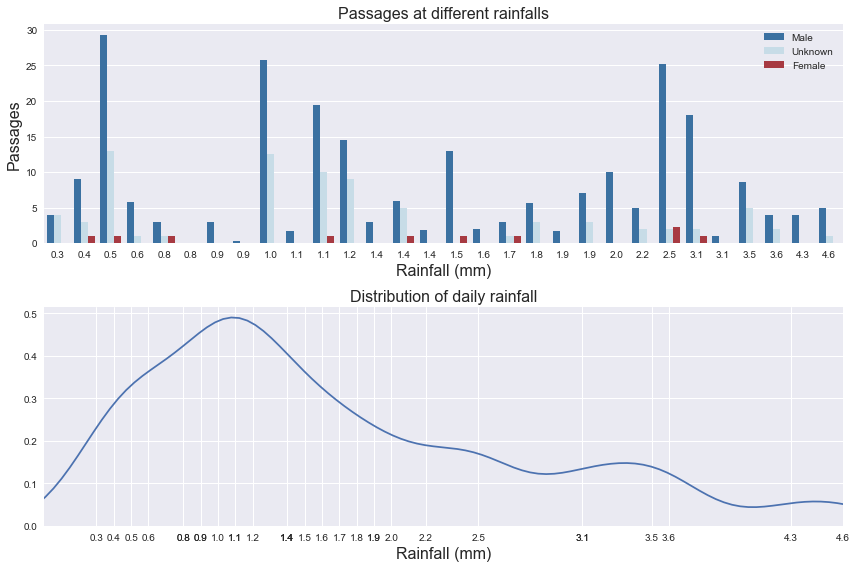

In [206]:
fig, axes = plt.subplots(2,1, figsize=(12,8))
sns.barplot(x='Rain', y='Passage W/O along', hue='SEX',
            data=rain_group, ax=axes[0], palette=[palette[0], palette[2], palette[-1]])
axes[0].set_xlabel('Rainfall (mm)', fontsize=16)
axes[0].set_ylabel('Passages', fontsize=16)
axes[0].legend(loc='upper right')
axes[0].set_title('Passages at different rainfalls', fontsize=16)
axes[0].set_xticklabels(['{:.1f}'.format(x) for x in rain_group['Rain'].unique()])

sns.distplot(giwe['Rain'].dropna(), hist=False, ax=axes[1])
axes[1].set_title('Distribution of daily rainfall', fontsize=16)
axes[1].set_xlabel('Rainfall (mm)', fontsize=16)
axes[1].set_xlim(0, 4.6)
axes[1].set_xticks(rain_group['Rain'].unique())
plt.tight_layout()

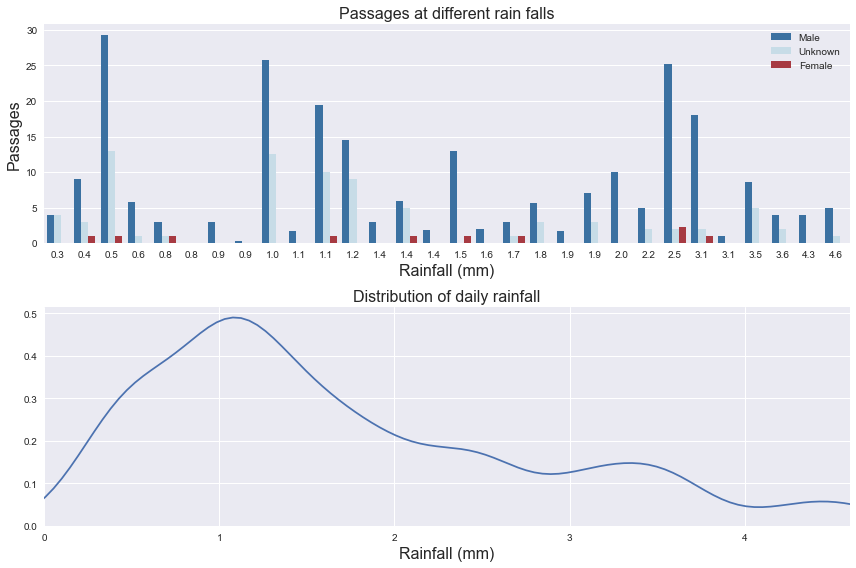

In [173]:
fig, axes = plt.subplots(2,1, figsize=(12,8))
sns.barplot(x='Rain', y='Passage W/O along', hue='SEX',
            data=rain_group, ax=axes[0], palette=[palette[0], palette[2], palette[-1]])
axes[0].set_xlabel('Rainfall (mm)', fontsize=16)
axes[0].set_ylabel('Passages', fontsize=16)
axes[0].legend(loc='upper right')
axes[0].set_title('Passages at different rain falls', fontsize=16)
axes[0].set_xticklabels(['{:.1f}'.format(x) for x in rain_group['Rain'].unique()])

sns.distplot(giwe['Rain'].dropna(), hist=False, ax=axes[1])
axes[1].set_title('Distribution of daily rainfall', fontsize=16)
axes[1].set_xlabel('Rainfall (mm)', fontsize=16)
axes[1].set_xlim(0, 4.6)
plt.tight_layout()

### Under vilken regnperiod görs flest passager? Passage vs kolumn ”365Rain, rain7lo-hi, rain30lo-hi och rain90lo-hi” – finns i fliken Daily weather

In [174]:
giwe.columns

Index(['DATE', 'DATE.1', 'CORRIDOR', 'HOUR', 'SEX', 'DIRECTION', 'IN', 'OUT',
       'GROUP SIZE', 'Passage W/O along', 'Passage', 'COMMENT',
       'MOON LUMINOSITY', 'MEAN TEMP', 'PRESSURE', 'HUMIDITY', 'WIND SPEED',
       'CLOUD COVERAGE', 'DATE.2', 'Rain', 'Rain7', 'Rain30', 'Rain90',
       'Temperature', 'Temp7', 'Temp30', 'Temp90', 'Pressure ~', 'Humidity~',
       'Wind~', 'Cloud coverage~', 'Moon Luminosity~', '365Temp', '365CC',
       '365Rain', 'Temp7hi-lo', 'Temp30hi-lo', 'Temp90hi-lo', 'Rain7hi-lo',
       'Rain30hi-lo', 'Rain90hi-lo', 'Unnamed: 23', 'Sum IN', 'Sum OUT',
       'Sum INOUT'],
      dtype='object')

In [175]:
giwe['365Rain'].unique()

array([  2.,   3.,   1.,  nan])

In [176]:
def get_rain_group(x):
    rain_period = giwe[[x, 'SEX', 'Passage W/O along']].copy()
    rain_period = rain_period.dropna()
    rain_period[x] = rain_period[x].astype(int)
    rain_period = rain_period.groupby([x, 'SEX']).sum().reset_index()
    return rain_period

In [177]:
rain_titles = {
    '365Rain': 'yearly', 
    'Rain7hi-lo': 'weekly', 
    'Rain30hi-lo': 'monthly', 
    'Rain90hi-lo': 'tri-monthly'
}
rain_map = {r: get_rain_group(r) for r in rain_titles.keys()}

In [178]:
rain_map['365Rain']

,365Rain,SEX,Passage W/O along
0,1,Female,4
1,1,Male,141
2,1,Unknown,40
3,2,Female,5
4,2,Male,162
5,2,Unknown,40
6,3,Female,5
7,3,Male,144
8,3,Unknown,22


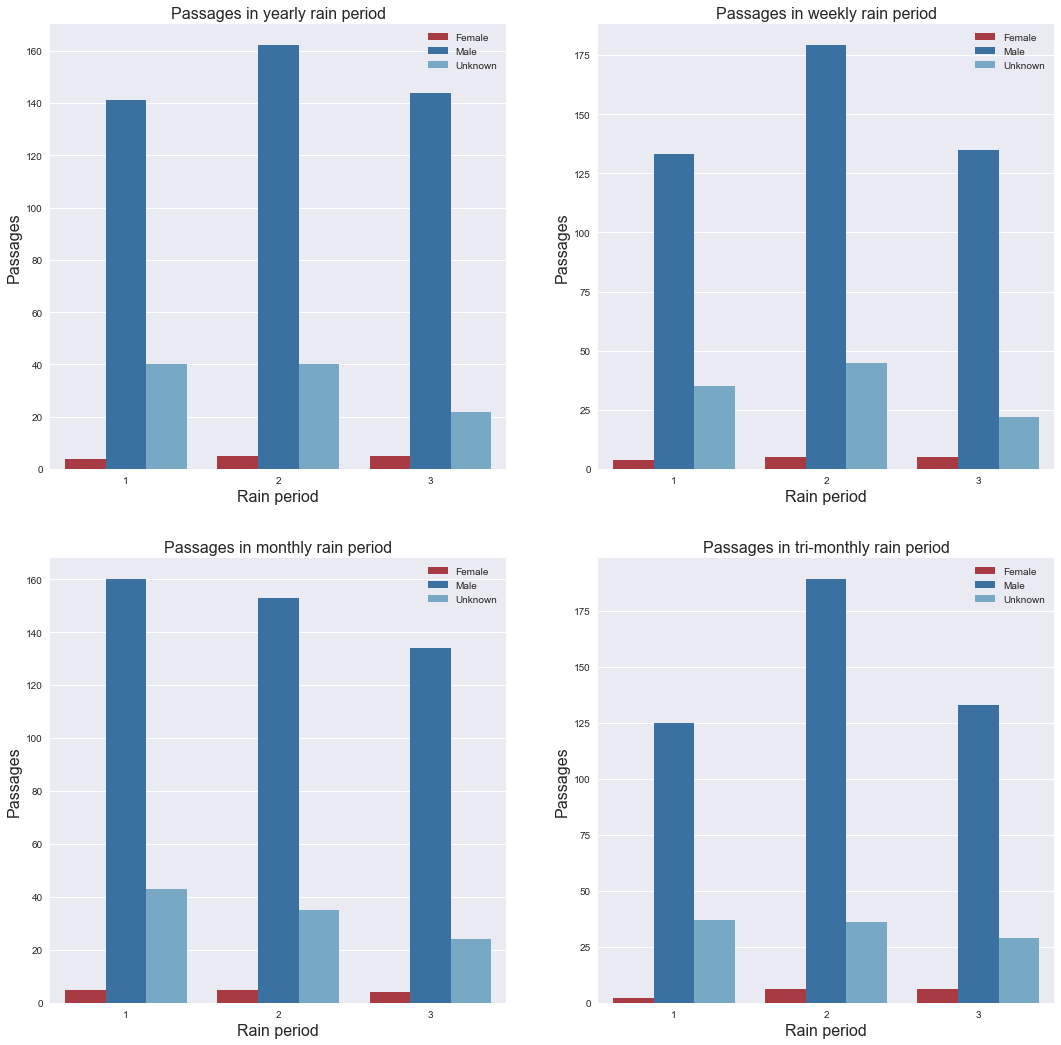

In [179]:
fig, axes = plt.subplots(2,2, figsize=(18,18))

for ax, (rain_name, rain_data) in zip(axes.flatten(), rain_map.items()):
    sns.barplot(x=rain_name, y='Passage W/O along', hue='SEX',
                data=rain_data, ax=ax, palette=[palette[-1], palette[0], palette[1]])
    ax.set_xlabel('Rain period', fontsize=16)
    ax.set_ylabel('Passages', fontsize=16)
    ax.legend(loc='upper right')
    ax.set_title(f'Passages in {rain_titles[rain_name]} rain period', fontsize=16)

In [180]:
giwe['Temperature'].unique()

array([ 23.,  22.,  21.,  20.,  19.,  24.,  25.,  26.,  18.,  17.,  16.,
        13.,  nan])

###	Av de passager som görs nattetid (mellan 19.00 och 6.00), hur många görs under respektive månfas? Dvs hur mycket påverkar nattljuset hur girafferna migrerar. Använder de korridorerna mer när det är fullmåne (kring månfas 5) eller nymåne (kring månfas 1,8).

In [181]:
moon = giwe[(giwe['HOUR'] <= 6.) | (giwe['HOUR'] >= 19.)]

In [182]:
moon['HOUR'].unique()

array([ 20.,   1.,  22.,  19.,   3.,  21.,   5.,   6.,   4.,   0.,   2.,
        23.])

In [183]:
giwe['Moon phase'].unique()

KeyError: 'Moon phase'

In [ ]:
moon['Passage W/O along'] = moon['Passage W/O along'].astype(int)

In [ ]:
moon['Passage W/O along'].unique()

In [ ]:
moon_group = moon.groupby('Moon phase').sum()['Passage W/O along'].reset_index()

In [ ]:
moon_group

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,8))
sns.barplot(x='Moon phase', y='Passage W/O along',
            data=moon_group, ax=ax, palette=[palette[0]])
ax.set_xlabel('Moon phase', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages between 19:00 and 06:00 summed over moon phase', fontsize=16)

## Verkar inte finnas några female under dessa tiden? Bara unknown och Male.

In [ ]:
moon_group2 = moon.groupby(['Moon phase', 'SEX']).sum()['Passage W/O along'].reset_index()

In [ ]:
pivot_moon = moon_group2.pivot(index='Moon phase', columns='SEX', values='Passage W/O along')

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,8))
pivot_moon.loc[:,].plot.bar(stacked=True, colors=[palette[0], palette[2]], ax=ax)
ax.set_xlabel('Moon phase', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages between 19:00 and 06:00 summed over moon phase', fontsize=16)
plt.xticks(rotation=0)
plt.grid(b=True, which='major', axis='x', linestyle='')
plt.grid(b=True, which='major', axis='y', linestyle='-')

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,8))
sns.barplot(x='Moon phase', y='Passage W/O along', hue='SEX',
            data=moon_group2, ax=ax, palette=[palette[0], palette[2]])
ax.set_xlabel('Moon phase', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages between 19:00 and 06:00 summed over moon phase', fontsize=16)

### Tar vi och summerar över moon phase och sex i alla tider (inte bara mellan 19-06) får vi lite females också..

In [ ]:
giwe[['Moon phase', 'SEX', 'Passage W/O along']].groupby(['Moon phase', 'SEX']).sum()